In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('computing_time_comparison_asina_option_1m.csv')
df

,n,wo_control_time,wo_control_price,wo_control_standard_error,w_control_time,w_control_price,w_control_standard_error,w_control_rho
0,50000,0.139,7.10274,0.038453,3.334,7.17180,0.001157,0.999566
1,100000,0.270,7.18544,0.027566,3.455,7.15860,0.000811,0.999566
2,500000,1.351,7.16679,0.012304,4.815,7.15322,0.000362,0.999563
3,1000000,2.736,7.17397,0.008689,6.423,7.16141,0.000257,0.999566
4,5000000,14.345,7.16676,0.003883,20.140,7.17112,0.000115,0.999564
5,10000000,27.399,7.16464,0.002747,35.368,7.17020,0.000081,0.999564


In [11]:
df2 = pd.read_csv('computing_time_comparison_asina_option_10k.csv').rename(columns={'n': 'n2',
                                                                                   'w_control_time': 'w_control_time_10k',
                                                                                    'w_control_price': 'w_control_price_10k',
                                                                                    'w_control_standard_error': 'w_control_standard_error_10k'})
df2

,n2,wo_control_time,wo_control_price,wo_control_standard_error,w_control_time_10k,w_control_price_10k,w_control_standard_error_10k,w_control_rho
0,50000,0.137,7.10274,0.038453,0.192,7.25914,0.001154,0.999529
1,100000,0.278,7.13287,0.027440,0.356,7.13506,0.000811,0.999591
2,500000,1.370,7.15331,0.012300,1.626,7.22110,0.000364,0.999565
3,1000000,2.743,7.15304,0.008677,3.196,7.17681,0.000257,0.999567
4,5000000,13.635,7.17098,0.003884,18.675,7.11658,0.000114,0.999532
5,10000000,36.023,7.16277,0.002746,39.584,7.19908,0.000081,0.999572


In [15]:
df = df.merge(df2[['n2', 'w_control_time_10k', 'w_control_price_10k', 'w_control_standard_error_10k']], left_on='n', right_on='n2')

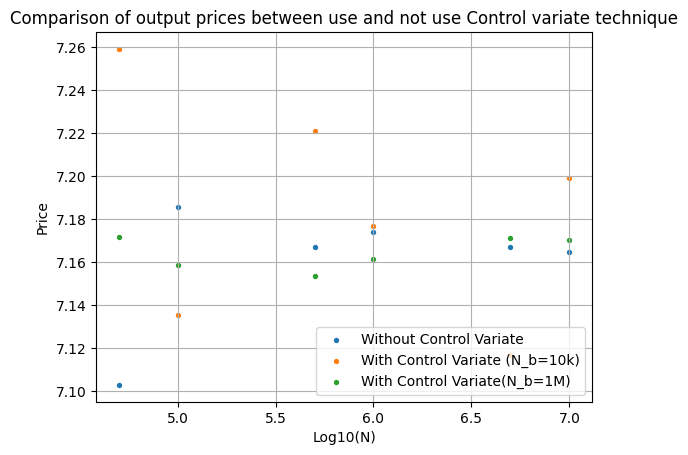

In [20]:
plt.scatter(np.log10(df['n']), df['wo_control_price'], label='Without Control Variate', s=8)
plt.scatter(np.log10(df['n']), df['w_control_price_10k'], label='With Control Variate (N_b=10k)', s=8)
plt.scatter(np.log10(df['n']), df['w_control_price'], label='With Control Variate(N_b=1M)', s=8)
plt.legend(loc='lower right')#, bbox_to_anchor=(1, 0.75))
plt.grid()
plt.title('Comparison of output prices between use and not use Control variate technique')
plt.ylabel('Price')
plt.xlabel('Log10(N)')
plt.show()

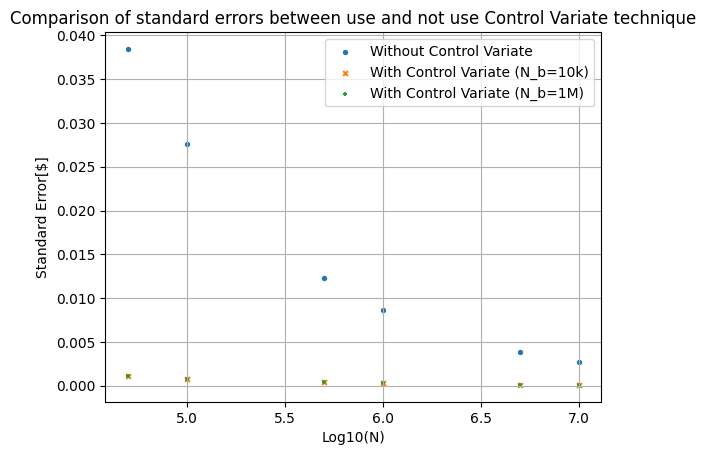

In [26]:
plt.scatter(np.log10(df['n']), df['wo_control_standard_error'], label='Without Control Variate', s=8)
plt.scatter(np.log10(df['n']), df['w_control_standard_error_10k'], marker='x', label='With Control Variate (N_b=10k)', s=12)
plt.scatter(np.log10(df['n']), df['w_control_standard_error'], marker='+', label='With Control Variate (N_b=1M)', s=12)

plt.legend(loc='upper right')#, bbox_to_anchor=(1, 0.5))
plt.grid()
plt.title('Comparison of standard errors between use and not use Control Variate technique')
plt.ylabel('Standard Error[$]')
plt.xlabel('Log10(N)')
plt.show()

In [17]:
df

,n,wo_control_time,wo_control_price,wo_control_standard_error,w_control_time,w_control_price,w_control_standard_error,w_control_rho,n2,w_control_time_10k,w_control_price_10k,w_control_standard_error_10k
0,50000,0.139,7.10274,0.038453,3.334,7.17180,0.001157,0.999566,50000,0.192,7.25914,0.001154
1,100000,0.270,7.18544,0.027566,3.455,7.15860,0.000811,0.999566,100000,0.356,7.13506,0.000811
2,500000,1.351,7.16679,0.012304,4.815,7.15322,0.000362,0.999563,500000,1.626,7.22110,0.000364
3,1000000,2.736,7.17397,0.008689,6.423,7.16141,0.000257,0.999566,1000000,3.196,7.17681,0.000257
4,5000000,14.345,7.16676,0.003883,20.140,7.17112,0.000115,0.999564,5000000,18.675,7.11658,0.000114
5,10000000,27.399,7.16464,0.002747,35.368,7.17020,0.000081,0.999564,10000000,39.584,7.19908,0.000081
